# Laplace Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The **Laplace equation** is given by

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0 \ , \ \ 0 \leq x \leq L_x \ , \ \ 0 \leq y \leq L_y
$$

where the solution $u(x,y)$ is defined on the rectangular domain $[0,L_x] \times [0,L_y]$.

## Boundary Conditions

Both variables $x$ and $y$ are spatial and there is no time variable $t$. Therefore there are only boundary conditions in the $x$ and $y$ directions and no initial condition to consider.

**Dirichlet boundary conditions** specify the values of the solution at the endpoints:

$$
u(0,y) = f_0(y) \hspace{20mm} u(L_x,y) = f_1(y)
$$

$$
u(x,0) = g_0(x) \hspace{20mm} u(x,L_y) = g_1(x)
$$

**Neumann boundary conditions** specify the values of the derivative of the solution at the endpoints:

$$
u_x(0,y) = p_0(y) \hspace{20mm} u_x(L_x,y) = p_1(y)
$$

$$
u_y(x,0) = q_0(x) \hspace{20mm} u_y(x,L_y) = q_1(x)
$$

When boundary conditions include both Dirichlet and Neumann conditions we call them **mixed boundary conditions**.

## Discretization

Choose the number of steps $N_x$ in the $x$ direction and $N_y$ steps in the $y$ direction. These choices determine the step sizes $\Delta x$ and $\Delta y$, and create a grid of points:

$$
\begin{align}
x_n &= n \Delta x \ , \ \ n = 0,1, \dots, N_x \ , \ \ \Delta x = \frac{L_x}{N_x} \\
y_m &= m \Delta y \ , \ \ m = 0,1, \dots, N_y \ , \ \ \Delta y = \frac{L_y}{N_y}
\end{align}
$$

The domain of the solution $u(x,y)$ is the rectangle $[0,L_x] \times [0,L_y]$. The goal of a finite difference method is to compute the matrix

$$
U = [u_{n,m}]
$$

which gives approximations of the solution $u(x,y)$ on the grid of points:

$$
u_{n,m} \approx u(x_n,y_m) = u(n \Delta x,m \Delta y)
$$

## Finite Difference Formula

Apply the central difference formula to both $u_{xx}$ and $u_{yy}$ at position $x_n$ and $y_m$

$$
\frac{u(x_{n+1},y_m) - 2 u(x_n,y_m) + u(x_{n-1},y_m)}{(\Delta x)^2} + O((\Delta x)^2) \hspace{40mm}
$$

$$
+ \frac{u(x_n,y_{m+1}) - 2 u(x_n,y_m) + u(x_n,y_{m-1})}{(\Delta y)^2} + O((\Delta y)^2) = 0
$$

Rearrange to get the finite difference equation

$$
u_{n,m} = \frac{ (\Delta y)^2 \left( u_{n+1,m} + u_{n-1,m} \right) + (\Delta x)^2 \left( u_{n,m+1} + u_{n,m-1} \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)}
$$

Note that if $\Delta x = \Delta y$ then the formula simplifies to

$$
u_{n,m} = \frac{u_{n+1,m} + u_{n-1,m} + u_{n,m+1} + u_{n,m-1}}{4}
$$

and the value at position $(x_n,y_m)$ is the average of the values in adjacent positions.

## Dirichlet Boundary Conditions

### Formulation

Consider the Laplace equation with Dirichlet boundary conditions:

$$
u(0,y) = f_0(y) \hspace{20mm} u(L_x,y) = f_1(y)
$$

$$
u(x,0) = g_0(x) \hspace{20mm} u(x,L_y) = g_1(x)
$$

It is possible to setup a large system of linear equations to numerically solve the Laplace equation however another method is to approximate the solution iteratively. In particular, define a sequence of matrices $U_0,U_1,U_2,\dots$ where $U_0 = [u_{n,m}^0]$ is the matrix of size $(N_x + 1) \times (N_y + 1)$ with boundary values given by the boundary conditions

$$
u^0_{0,m} = f_0(y_m) \ \ , \ \ u^0_{N_x,m} = f_1(y_m) \ \ , \ \ u^0_{n,0} = g_0(x_n) \ \ , \ \ u^0_{n,N_y} = g_1(x_n)
$$

and all other values in the interior of the matrix are 0s:

$$
u_{n,m}^0 = 0 \ \ , \ \ 0 < n < N_x \ \ , \ \ 0 < m < N_y
$$

Given the $k$th matrix $U_k = [u_{n,m}^k]$, compute the next matrix $U_{k+1} = [u_{n,m}^{k+1}]$ by again setting the boundary values 

$$
u^{k+1}_{0,m} = f_0(y_m) \ \ , \ \
u^{k+1}_{N_x,m} = f_1(y_m) \ \ , \ \
u^{k+1}_{n,0} = g_0(x_n) \ \ , \ \
u^{k+1}_{n,N_y} = g_1(x_n)
$$

and then computing the finite difference formula

$$
u^{k+1}_{n,m} = \frac{ (\Delta y)^2 \left( u^k_{n+1,m} + u^k_{n-1,m} \right) + (\Delta x)^2 \left( u^k_{n,m+1} + u^k_{n,m-1} \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)} \ \ , \ \ 0 < n < N_x \ \ , \ \ 0 < m < N_y
$$

Iterate until the average squared difference $\Delta U_k$ from iteration $k$ to $k+1$ is less than some set value $D$:

$$
\Delta U_k = \sqrt{\frac{1}{(N_x+1)(N_y+1)} \sum_{n=0}^{N_x} \sum_{m=0}^{N_y} \left( u^{k+1}_{n,m} - u^k_{n,m} \right)^2 } < D
$$

### Implementation

The function `laplaceD` takes input parameters `f0`, `f1`, `g0`, `g1`, `Lx`, `Ly`, `Nx`, `Ny`, `D` and `max_iter` where:

* `f0` is a Python function which represents the Dirichlet boundary condition $u(0,y) = f_0(y)$
* `f1` is a Python function which represents the Dirichlet boundary condition $u(L_x,y) = f_1(y)$
* `g0` is a Python function which represents the Dirichlet boundary condition $u(x,0) = g_0(x)$
* `g1` is a Python function which represents the Dirichlet boundary condition $u(x,L_y) = g_1(x)$
* `Lx` and `Ly` define the domain $[0,L_x] \times [0,L_y]$
* `Nx` and `Ny` are the number of steps in $x$ and $y$ directions of the discretization respectively
* `D` is the stopping criteria $\Delta U_k < D$
* `max_iter` is the maximum number of iterations before the iteration is forced to stop

The function returns the matrix $U = [u_{n,m}]$ of size $(N_x + 1) \times (N_y + 1)$ of approximations $u_{n,m} \approx u(x_n,y_m)$.

Set default values `Lx=1`, `Ly=1`, `Nx=50`, `Ny=50`, `D=0.001` and `max_iter=1000`.

In [2]:
def laplaceD(f0,f1,g0,g1,Lx=1,Ly=1,Nx=50,Ny=50,D=0.001,max_iter=1000):
    U = np.zeros([Nx + 1,Ny + 1])
    dx = Lx/Nx
    dy = Ly/Ny
    for n in range(Nx + 1):
        U[n, 0] = g0(n*dx)
        U[n,Ny] = g1(n*dx)
    for m in range(Ny + 1):
        U[0, m] = f0(m*dy)
        U[Nx,m] = f1(m*dy)
    for k in range(max_iter):
        Uk = U.copy()
        for n in range(1,Nx):
            for m in range(1,Ny):
                U[n,m] = (dy**2*(Uk[n+1,m] + Uk[n-1,m]) + dx**2*(Uk[n,m+1] + Uk[n,m-1]))/(2*dx**2 + 2*dy**2)
        dU = np.sqrt(np.sum((Uk - U)**2)/(Nx + 1)/(Ny + 1))
        if dU < D:
            break
    if k == max_iter - 1:
        print("Exceeded maximum iterations.")
    else:
        print(f"Found approximation U with dUk = {dU} after k = {k} iterations.")
    return U

Note that the row index of $U$ corresponds to the variable $x$. Therefore if we want to visualize the solution with $x$ in the horizontal direction and $y$ increasing in the vertical direction then we need to plot the transpose $U^T$ with the $y$ axis flipped. Let's write a function which does this.

In [3]:
def plot_laplace(U):
    W = np.flip(U.T,axis=0)
    plt.imshow(W,cmap='RdBu_r')
    M = np.max(np.abs(U))
    plt.clim([-M,M]), plt.axis('off'), plt.colorbar()
    plt.show()

Approximate the solution for $u(x,0) = u(0,y) = u(1,y) = 0$ and $u(x,1) = 1$. Note that boundary conditions are always defined as Python functions.

Found approximation U with dUk = 0.000989946333128293 after k = 78 iterations.


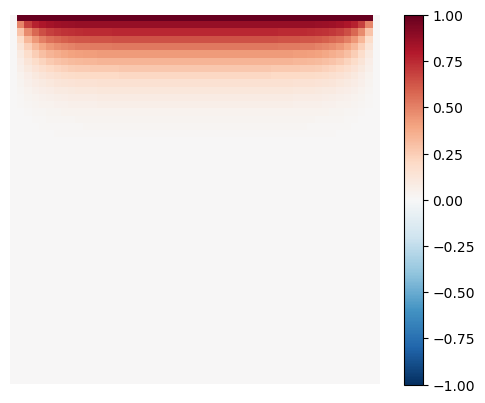

In [4]:
f0 = lambda y: 0.
f1 = lambda y: 0.
g0 = lambda x: 0.
g1 = lambda x: 1.
U = laplaceD(f0,f1,g0,g1)
plot_laplace(U)

### Examples

**Example 1.** Compute the solution for $u(x,0) = 2x$, $u(x,1) = x - 1$, $u(0,y) = -y$, $u(1,y) = 2(1 - y)$. Use $N_x=N_y=100$.

Found approximation U with dUk = 0.0009948807049315277 after k = 133 iterations.


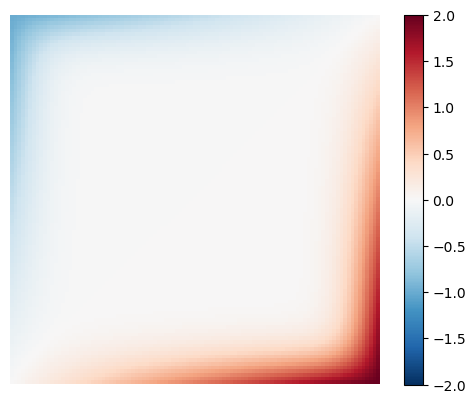

In [5]:
f0 = lambda y: -y
f1 = lambda y: 2*(1 - y)
g0 = lambda x: 2*x
g1 = lambda x: x - 1
U = laplaceD(f0,f1,g0,g1,Nx=100,Ny=100)
plot_laplace(U)

**Example 2.** Compute the solution for $u(x,0) = x^2 - 1$, $u(x,1) = x^2$, $u(0,y) = y^2 - 1$, $u(1,y) = y^2$. Use $D = 0.0001$.

Found approximation U with dUk = 9.984942556051082e-05 after k = 665 iterations.


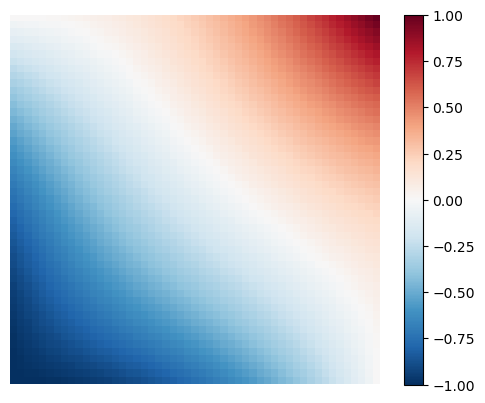

In [6]:
f0 = lambda y: y**2 - 1
f1 = lambda y: y**2
g0 = lambda x: x**2 - 1
g1 = lambda x: x**2
U = laplaceD(f0,f1,g0,g1,D=0.0001)
plot_laplace(U)

**Example 3.** Compute the solution for boundary conditions $u(x,0) = \cos(\pi x)$, $u(x,1) = \cos(2 \pi x)$, $u(0,y) = 1$ and $u(2,y) = 1$. Use $N_x=100$.

Found approximation U with dUk = 0.0009963950622914157 after k = 115 iterations.


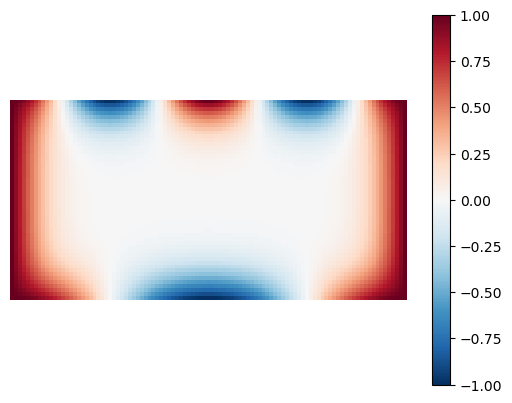

In [7]:
f0 = lambda y: 1.
f1 = lambda y: 1.
g0 = lambda x: np.cos(np.pi*x)
g1 = lambda x: np.cos(2*np.pi*x)
U = laplaceD(f0,f1,g0,g1,Lx=2,Nx=100)
plot_laplace(U)

## Neumann Boundary Conditions

### Formulation

Consider the Laplace equation with Neumann boundary condition $u_x(0,y) = p_0(y)$. Apply the central difference formula:

$$
u_x(0,y) = \frac{u(\Delta x,y) - u(-\Delta x,y)}{2 \Delta x} + O((\Delta x)^2)
$$

Introduce the "ghost" value $u_{-1,m}$ and write the formula

$$
p_0(y_m) = \frac{u_{1,m} - u_{-1,m}}{2 \Delta x}
$$

and rearrange

$$
u_{-1,m} = u_{1,m} - 2 \Delta x p_0(y_m)
$$

The finite difference formula at $x=0$ and $y=y_m$ is given by

$$
u_{0,m} = \frac{ (\Delta y)^2 \left( u_{1,m} + u_{-1,m} \right) + (\Delta x)^2 \left( u_{0,m+1} + u_{0,m-1} \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)}
$$

and rearrange to get

$$
u_{0,m} = \frac{ 2 (\Delta y)^2 \left(u_{1,m} - \Delta x p_0(y_m) \right) + (\Delta x)^2 \left( u_{0,m+1} + u_{0,m-1} \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)}
$$


Consider the Laplace equation with Neumann boundary condition $u_x(L_x,y) = p_1(y)$. The central difference formula gives an expression for the "ghost" value $u_{N_x + 1,m}$:

$$
u_{N_x + 1,m} = u_{N_x - 1,m} + 2 \Delta x p_1(y_m)
$$

and the finite difference formula at $x=L_x$ and $y=y_m$ is given by

$$
u_{N_x,m} = \frac{ 2 (\Delta y)^2 \left( u_{N_x - 1,m} + \Delta x p_1(y_m) \right) + (\Delta x)^2 \left( u_{N_x,m+1} + u_{N_x,m-1} \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)}
$$

Consider the Laplace equation with Neumann boundary condition $u_y(x,0) = q_0(x)$. The central difference formula gives an expression for the "ghost" value $u_{n,-1}$:

$$
u_{n,-1} = u_{n,1} - 2 \Delta y q_0(x_n)
$$

and the central difference formula at $x=x_n$ and $y=0$ is given by

$$
u_{n,0} = \frac{ (\Delta y)^2 \left( u_{n+1,0} + u_{n-1,0} \right) + 2(\Delta x)^2 \left( u_{n,1} - \Delta y q_0(x_n) \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)}
$$

Consider the Laplace equation with Neumann boundary condition $u_y(x,L_y) = q_1(x)$. The central difference formula gives an expression for the "ghost" value $u_{n,N_y+1}$:

$$
u_{n,N_y+1} = u_{n,N_y-1} + 2 \Delta y q_1(x_n)
$$

and the finite difference formula at $x=x_n$ and $y=L_y$ is given by

$$
u_{n,N_y} = \frac{ (\Delta y)^2 \left( u_{n+1,N_y} + u_{n-1,N_y} \right) + 2(\Delta x)^2 \left( u_{n,N_y-1} + \Delta y q_1(x_n) \right) }{2 \left((\Delta x)^2 + (\Delta y)^2 \right)}
$$

## General Implementation

The function `laplace` takes input parameters:

* `BCx0` is the type of boundary condition at $x=0$ (`D` for Dirichlet or `N` for Neumann)
* `f0` is a Python function which represents the boundary condition $f_0(y)$ at $x=0$
* `BCx1` is the type of boundary condition at $x=L_x$ (`D` for Dirichlet or `N` for Neumann)
* `f1` is a Python function which represents the boundary condition $f_1(y)$ at $x=L_x$
* `BCy0` is the type of boundary condition at $y=0$ (`D` for Dirichlet or `N` for Neumann)
* `g0` is a Python function which represents the boundary condition $g_0(x)$ at $y=0$
* `BCy1` is the type of boundary condition at $y=L_y$ (`D` for Dirichlet or `N` for Neumann)
* `g1` is a Python function which represents the boundary condition $g_1(x)$ at $y=L_y$
* `Lx` and `Ly` define the domain $[0,L_x] \times [0,L_y]$
* `Nx` and `Ny` are the number of steps in $x$ and $y$ directions of the discretization respectively
* `D` is the stopping criteria $\Delta U_k < D$
* `max_iter` is the maximum number of iterations before the iteration is forced to stop

The function returns the matrix $U = [u_{n,m}]$ of size $(N_x+1) \times (N_y+1)$ of approximations $u_{n,m} \approx u(x_n,y_m)$.

Set default values `Lx=1`, `Ly=1`, `Nx=50`, `Ny=50`, `D=0.001` and `max_iter=1000`.

In [8]:
def laplace(BCx0,f0,BCx1,f1,BCy0,g0,BCy1,g1,Lx=1,Ly=1,Nx=50,Ny=50,D=0.001,max_iter=1000):
    
    U = np.zeros([Nx + 1,Ny + 1])
    dx = Lx/Nx
    dy = Ly/Ny
    
    if (BCx0 not in ['D','N']) or (BCx1 not in ['D','N']) or (BCy0 not in ['D','N']) or (BCy1 not in ['D','N']):
        raise Exception("Expecting boundary conditions of type 'D' or 'N'.")

    for k in range(max_iter):
        
        Uk = U.copy()
        
        if BCx0 == 'D' and k == 0:
            for m in range(Ny + 1):
                U[0,m] = f0(m*dy)
        elif BCx0 == 'N':
            for m in range(1,Ny):
                U[0,m] = (2*dy**2*(Uk[1,m] - dx*f0(m*dy)) + dx**2*(Uk[0,m+1] + Uk[0,m-1]))/(2*(dx**2 + dy**2))

        if BCx1 == 'D' and k == 0:
            for m in range(Ny + 1):
                U[Nx,m] = f1(m*dy)
        elif BCx1 == 'N':
            for m in range(1,Ny):
                U[Nx,m] = (2*dy**2*(Uk[Nx-1,m] + dx*f1(m*dy)) + dx**2*(Uk[Nx,m+1] + Uk[Nx,m-1]))/(2*(dx**2 + dy**2))

        if BCy0 == 'D' and k == 0:
            for n in range(Nx + 1):
                U[n,0] = g0(n*dx)
        elif BCy0 == 'N':
            for n in range(1,Nx):
                U[n,0] = (dy**2*(Uk[n+1,0] + Uk[n-1,0]) + 2*dx**2*(Uk[n,1] - dy*g0(n*dx)))/(2*(dx**2 + dy**2))

        if BCy1 == 'D' and k == 0:
            for n in range(Nx + 1):
                U[n,Ny] = g1(n*dx)
        elif BCy1 == 'N':
            for n in range(1,Nx):
                U[n,Ny] = (dy**2*(Uk[n+1,Ny] + Uk[n-1,Ny]) + 2*dx**2*(Uk[n,Ny-1] + dy*g1(n*dx)))/(2*(dx**2 + dy**2))

        if BCx0 == 'N' and BCy0 == 'N':
            U[0,0] = (dy**2*(Uk[1,0] - dx*f0(0)) + dx**2*(Uk[0,1] - dy*g0(0)))/(dx**2 + dy**2)

        if BCx1 == 'N' and BCy0 == 'N':
            U[Nx,0] = (dy**2*(Uk[Nx-1,0] + dx*f1(0)) + dx**2*(Uk[Nx,1] - dy*g0(Lx)))/(dx**2 + dy**2)

        if BCx0 == 'N' and BCy1 == 'N':
            U[0,Ny] = (dy**2*(Uk[1,Ny] - dx*f0(Ly)) + dx**2*(Uk[0,Ny-1] + dy*g1(0)))/(dx**2 + dy**2)

        if BCx1 == 'N' and BCy1 == 'N':
            U[Nx,Ny] = (dy**2*(Uk[Nx-1,Ny] + dx*f1(Ly)) + dx**2*(Uk[Nx,Ny-1] + dy*g1(Ly)))/(dx**2 + dy**2)
        
        for n in range(1,Nx):
            for m in range(1,Ny):
                U[n,m] = (dy**2*(Uk[n+1,m] + Uk[n-1,m]) + dx**2*(Uk[n,m+1] + Uk[n,m-1]))/(2*dx**2 + 2*dy**2)
        
        dU = np.sqrt(np.sum((Uk - U)**2)/(Nx + 1)/(Ny + 1))
        if dU < D:
            break
            
    if k == max_iter - 1:
        print("Exceeded maximum iterations.")
    else:
        print(f"Found approximation U with dUk = {dU} after k = {k} iterations.")

    return U

## Examples

Approximate the solution for $u(0,y) = u(2,y) = 1$, $u(x,0) = \cos(\pi x)$ and $u(x,1) = \cos(2 \pi x)$.

Found approximation U with dUk = 0.0009963950622914157 after k = 116 iterations.


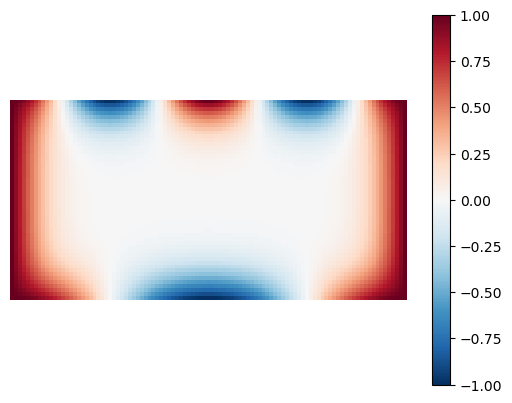

In [9]:
f0 = lambda y: 1.
f1 = lambda y: 1.
g0 = lambda x: np.cos(np.pi*x)
g1 = lambda x: np.cos(2*np.pi*x)
U = laplace('D',f0,'D',f1,'D',g0,'D',g1,Lx=2,Nx=100)
plot_laplace(U)

The result agrees with our previous example using `laplaceD` above.

Approximate the solution for $u_x(0,y) = 0$, $u(1,y) = -\cos(\pi y)$, $u(x,0) = -1$ and $u(x,1) = 1$.

Found approximation U with dUk = 0.0009962630948015196 after k = 160 iterations.


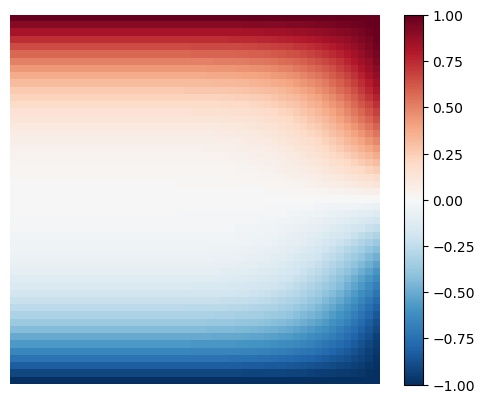

In [10]:
f0 = lambda y: 0.
f1 = lambda y: -np.cos(np.pi*y)
g0 = lambda x: -1.
g1 = lambda x: 1.
U = laplace('N',f0,'D',f1,'D',g0,'D',g1)
plot_laplace(U)